<a href="https://colab.research.google.com/github/signofcommunication/Tugas-Matana-University/blob/master/Deteksi_Jawaban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python matplotlib
from google.colab import files
import cv2, numpy as np, matplotlib.pyplot as plt
from collections import Counter

Unggah gambar lembar jawaban (.jpg atau .png):


Saving kertas 2.jpg to kertas 2 (1).jpg

Gambar dengan lingkaran terdeteksi:


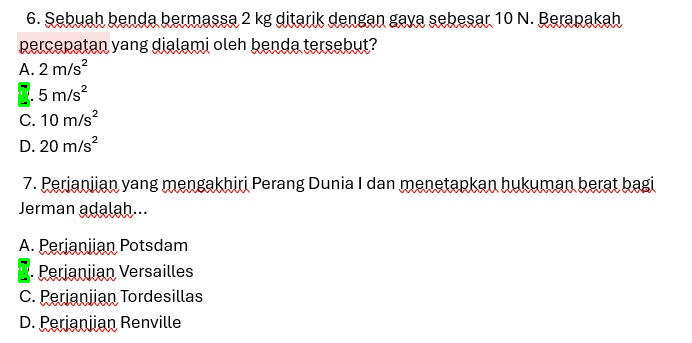

In [6]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Kunci jawaban untuk 5 pertanyaan (ubah sesuai kebutuhan)
kunci_jawaban = ['a', 'b', 'c', 'd', 'e']

# Fungsi untuk mendeteksi jawaban dari gambar
def deteksi_jawaban(image_path):
    # Baca gambar
    img = cv2.imread(image_path)
    if img is None:
        print("Gagal membaca gambar!")
        return None, None

    # Konversi ke grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Terapkan Gaussian Blur untuk kurangi noise
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Thresholding untuk binerisasi (asumsi background putih)
    _, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)

    # Temukan kontur (lingkaran)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Asumsi: 5 pertanyaan vertikal, masing-masing punya 5 pilihan horizontal (a b c d e)
    jawaban_terdeteksi = []
    height, width = gray.shape
    pertanyaan_height = height // 5  # Bagi tinggi gambar menjadi 5 bagian untuk 5 pertanyaan

    for i in range(5):  # Untuk setiap pertanyaan
        y_start = i * pertanyaan_height
        y_end = (i + 1) * pertanyaan_height
        pilihan = None

        for cnt in contours:
            # Filter kontur yang mirip lingkaran
            approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), closed=True)
            area = cv2.contourArea(cnt)
            (x, y, w, h) = cv2.boundingRect(cnt)

            # Cek jika kontur di wilayah pertanyaan ini dan mirip lingkaran
            if y_start < y < y_end and area > 100 and len(approx) > 5 and 0.7 < w/h < 1.3:
                # Tentukan posisi horizontal untuk map ke a/b/c/d/e
                pos_x = x / width
                if pos_x < 0.2:
                    pilihan = 'a'
                elif pos_x < 0.4:
                    pilihan = 'b'
                elif pos_x < 0.6:
                    pilihan = 'c'
                elif pos_x < 0.8:
                    pilihan = 'd'
                else:
                    pilihan = 'e'
                break  # Asumsi hanya satu lingkaran per pertanyaan

        jawaban_terdeteksi.append(pilihan if pilihan else 'Tidak terdeteksi')

    # Gambar kontur pada gambar asli untuk visualisasi
    img_with_contours = img.copy()
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), closed=True)
        if len(approx) > 5 and cv2.contourArea(cnt) > 100:
            cv2.drawContours(img_with_contours, [cnt], -1, (0, 255, 0), 2)

    return jawaban_terdeteksi, img_with_contours

# Unggah gambar
print("Unggah gambar lembar jawaban (.jpg atau .png):")
uploaded = files.upload()

# Proses gambar yang diunggah
if uploaded:
    image_path = list(uploaded.keys())[0]
    jawaban, img_with_contours = deteksi_jawaban(image_path)

    # Tampilkan gambar dengan kontur terdeteksi
    if img_with_contours is not None:
        print("\nGambar dengan lingkaran terdeteksi:")
        cv2_imshow(img_with_contours)

    # Tampilkan hasil deteksi
    if jawaban:
        benar = 0
        salah = 0
        for i in range(5):
            if jawaban[i] == kunci_jawaban[i]:
                benar += 1
            else:
                salah += 1
else:
    print("Tidak ada gambar yang diunggah!")